# Keras API Project Exercise - Tilemachos' Solution

## The Data



LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

Using Subset of LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

In [5]:
#%% -*- coding: utf-8 -*-
"""
Created on Mon Oct  5 09:42:57 2020

@author: Tilemachos
"""

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from os import chdir
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Data Loading

In [39]:
chdir('E:/MyProjects/Udemy_DataScience/Refactored_Py_DS_ML_Bootcamp-master/DATA')

info = pd.read_csv('lending_club_info.csv', index_col = 'LoanStatNew')
df = pd.read_csv('lending_club_loan_two.csv')

# Helper function to quickly get feature info
def feat_info(col_name):
    print(info.loc[col_name]['Description'])

# Preemptive Exploratory Data Analysis

### Is there any relationship between expensive loans, and not being able to pay them off, or the opposite?

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

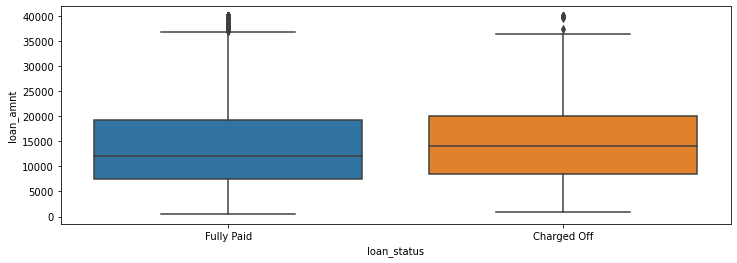

In [40]:
plt.figure(figsize=(12,4))
sns.boxplot(x='loan_status', y = 'loan_amnt', data = df)

### There is a slight increase of charged off large loans, but not much
### We and also check that by examining the numbers:

In [41]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


### Now, let's investigate the grades and subgrades.

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

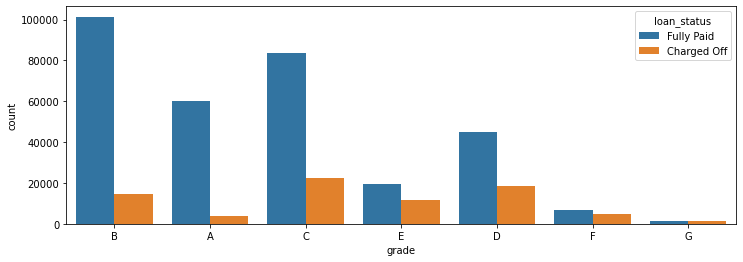

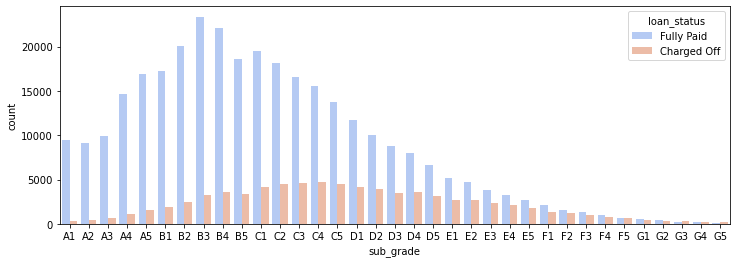

In [42]:
# How does grade affect the label?
plt.figure(figsize=(12,4))
sns.countplot(x='grade', data=df, hue='loan_status')

# And subgrade?
subgrade_order = sorted(df['sub_grade'].unique())
plt.figure(figsize=(12,4))
sns.countplot(x='sub_grade', data=df, order=subgrade_order,palette='coolwarm', hue='loan_status')

### F and G loans are almost 50% paid, so maybe it's not even worth giving people these loans
### Let us examine the F and G grades in a more granular manner

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

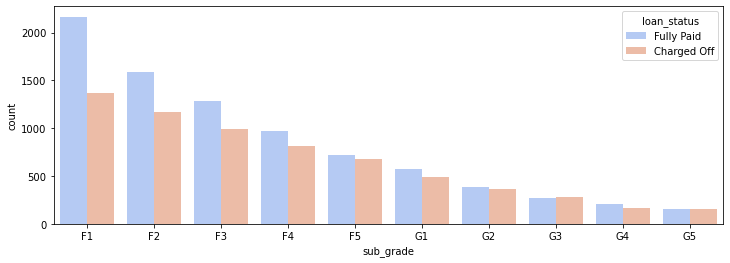

In [43]:
f_and_g = df[ (df['grade'] == 'G') | (df['grade'] == 'F') ]
plt.figure(figsize=(12,4))
sns.countplot(x='sub_grade', data=f_and_g, order=sorted(f_and_g['sub_grade'].unique()), hue='loan_status',palette='coolwarm')

### It seems that only the highest subgrades of the "F-G" group have some small value

### Let us now examine how numerical features affect the label

<AxesSubplot:>

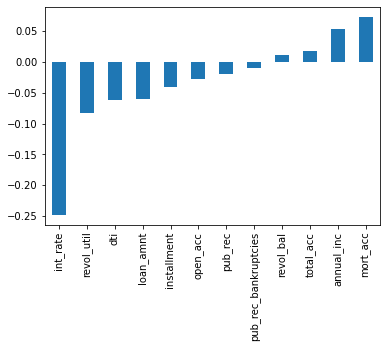

In [44]:
# Convert loan_status column to numerical
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1, 'Charged Off':0})
df.drop('loan_status',axis=1,inplace=True)

# Show correlation bars of features to loan_repaid label
df.corr()['loan_repaid'].sort_values().iloc[:-1].plot(kind='bar')

# Data Cleaning - Missing Data

## Check how much of each feature is missing

In [48]:
print(100*df.isnull().sum() / len(df))

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64


### Let us examine how employment length affects loan repayments.
### Plot employment length (ignoring the 4.6% missing) against loan repayment status

<AxesSubplot:xlabel='emp_length', ylabel='count'>

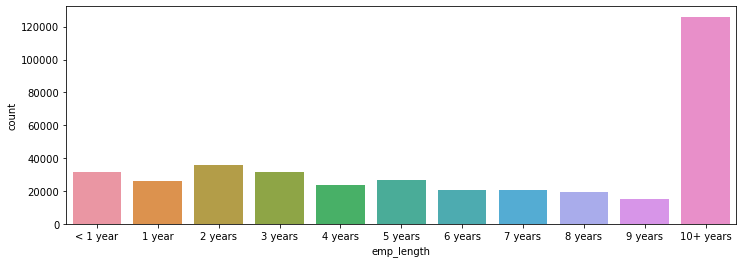

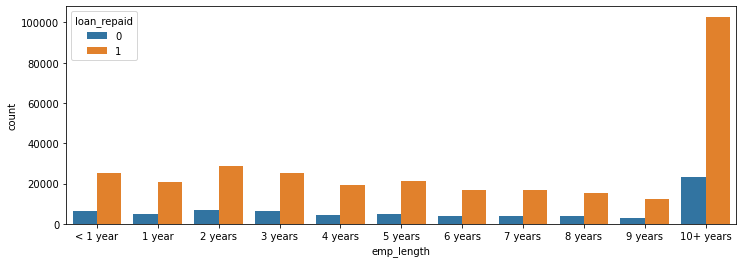

In [49]:
sorted(df['emp_length'].dropna().unique())
emp_length_order = ['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

plt.figure(figsize=(12,4))
sns.countplot(data=df, x='emp_length',order = emp_length_order)
plt.figure(figsize=(12,4))
sns.countplot(data=df, x='emp_length',order = emp_length_order,hue='loan_repaid')

### It seems that most subjects have been employed for 10 or more years. Let us examine the ratios over each employment length category.

<AxesSubplot:xlabel='emp_length', ylabel='ratio'>

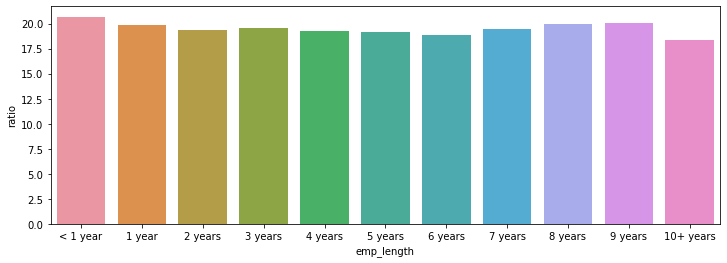

In [50]:
# Get value counts of repaid and not repaid loans, for each employment length category
my_pivot = df.groupby('emp_length')['loan_repaid'].value_counts()

# Currently every row (employment length) has two rows - one for each loan outcome
# Unstack so that we get two columns for each row (one column for each outcome)
# Now we can calculate the ratio of not repaid loans
emp_length_ratio = 100*my_pivot.unstack(level=-1)[0]/df.groupby('emp_length')['loan_repaid'].count()
emp_length_ratio = pd.DataFrame(emp_length_ratio, columns = ['ratio'])

plt.figure(figsize=(12,4))
sns.barplot(data=emp_length_ratio.reset_index(),x='emp_length',y='ratio',order = emp_length_order)

### We can see that the ratio is almost evenly distributed among all employment lengths (with a +/- 2% deviation). We can therefore drop this feature

In [51]:
# This feature doesn't really affect the label, so we can ignore it.
df.drop('emp_length',axis=1,inplace=True)

### If we examine 'title' and 'purpose' more carefully, is contains duplicated information.

In [52]:
# Drop Title columns, as it contains duplicate information
df.drop('title', axis=1, inplace=True)

### Examining the employment titles, we see that realistically there are too many unique job titles to convert to a dummy variable, so we'll just drop it.
Alternatively, with a bit of domain knowledge a clustering of some of the most frequent jobs could be done.

In [53]:
df['emp_title'].value_counts()

Teacher                            4389
Manager                            4250
Registered Nurse                   1856
RN                                 1846
Supervisor                         1830
                                   ... 
The Collegiate School                 1
Office & Workforce Manager            1
Certified Medical Assistant III       1
renown tag and label                  1
Active sport & lifestyle              1
Name: emp_title, Length: 173105, dtype: int64

In [54]:
df.drop('emp_title', axis=1, inplace=True)

### We examine the mortgage account column, which as we saw above has almost 10% missing data. This means that if we drop these rows, we lose 10% of our data, so this is not an option. We could also just drop this feature, but let's think of an alternative.

In [55]:
# Examine mort_acc
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

### Which columns are most highly correlated with mort_acc?

In [56]:
# Which columns are most highly correlated with mort_acc?
df.corr()['mort_acc'].sort_values(ascending=False).iloc[1:]

total_acc               0.381072
annual_inc              0.236320
loan_amnt               0.222315
revol_bal               0.194925
installment             0.193694
open_acc                0.109205
loan_repaid             0.073111
pub_rec_bankruptcies    0.027239
pub_rec                 0.011552
revol_util              0.007514
dti                    -0.025439
int_rate               -0.082583
Name: mort_acc, dtype: float64

### Perhaps unsurprisingly, this is the total account column (as it is a sum of, among others, the mortgage accounts)
### Let's plot the distributions of the 'total_acc' column for the missing and present data to see how the statistics are affected

<AxesSubplot:xlabel='total_acc', ylabel='Density'>

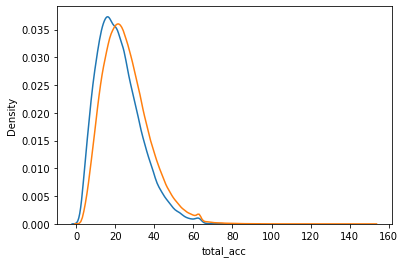

In [58]:
# Plot distribution for the 'total_acc' column of rows that contain 'mort_acc' values,
# and then those that are missing 'mort_acc' values
sns.kdeplot(df[df['mort_acc'].isnull()]['total_acc'])
sns.kdeplot(df[~df['mort_acc'].isnull()]['total_acc'])

### There is a very similar distribution in the total_acc values of both groups of rows. We can calculate what is the mean number of mortgage accounts for all entries with a specific number of total accounts. Then, we can fill in the missing 'mort_acc' values using the mean of their equivalent 'total_acc' cluster. This way we are practically 'predicting' the expected value of 'mort_acc', since the missing data follow the same distribution as the ones used for the prediction.

In [59]:
# Let's get the mean mort_acc value for each total_acc
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']
# We can use this as a lookup to fill in the missing values
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'],x['mort_acc']),axis = 1)

In [60]:
#Check again how much of each feature is missing
print(100*df.isnull().sum() / len(df))

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64


### Now less than 0.5% of data are missing, whose entries we could simply remove

In [61]:
df.dropna(inplace=True)
print(100*df.isnull().sum() / len(df))

loan_amnt               0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
purpose                 0.0
dti                     0.0
earliest_cr_line        0.0
open_acc                0.0
pub_rec                 0.0
revol_bal               0.0
revol_util              0.0
total_acc               0.0
initial_list_status     0.0
application_type        0.0
mort_acc                0.0
pub_rec_bankruptcies    0.0
address                 0.0
loan_repaid             0.0
dtype: float64


# Data preprocessing

## Term feature

In [62]:
#Term feature

feat_info('term')
df['term'].value_counts()

The number of payments on the loan. Values are in months and can be either 36 or 60.


 36 months    301247
 60 months     93972
Name: term, dtype: int64

### 2 choices here: Convert them to numeric or one-hot encode into '60 months' or 'not 60 months'
### However, converting to numeric also preserves the temporal relationship between the two, so it might be a good idea to keep that


In [63]:
# Convert term months to float
df['term'] = df['term'].apply(lambda x: int(x.split()[0]))

## Grade feature

In [64]:
# Grade feature
# grade is a part of subgrade, so we can drop it (duplicate information)
df.drop('grade',axis=1,inplace=True)

### Subgrade is categorical, so we convert it into dummy variables

In [65]:
# Convert subgrade into dummy variables

dummies = pd.get_dummies(df['sub_grade'], drop_first=True)
df = pd.concat([df.drop('sub_grade', axis=1),dummies], axis=1)

### Similarly for verification_status, application_type, initial_list_status and purpose. They also have very few categories.

In [66]:
# Similarly for verification_status, application_type, initial_list_status and
# purpose. They also have very few categories.

dummies = pd.get_dummies(df[['verification_status', 'application_type',
                  'initial_list_status','purpose']], drop_first=True)
df = pd.concat([df.drop(['verification_status', 'application_type',
                  'initial_list_status','purpose'], axis=1),dummies], axis=1)

## Home ownership feature

In [67]:
# Home ownership feature
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

### Most people have the first few categories, so classify all the others as 'other'

In [69]:
# Most people have the first few categories, so classify all the others as 'other'
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')
dummies = pd.get_dummies(df['home_ownership'], drop_first=True)
df = pd.concat([df.drop('home_ownership', axis=1),dummies], axis=1)

## Address

In [70]:
# Address
print(df['address'])

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object


### This contains a full address. An efficient way to engineer this feature is to extract the zip code (more detailed than state, more generalized than street + number)

In [71]:
# Extract the zip code and save as separate column
df['zipcode'] = df['address'].apply(lambda adrs: adrs.split()[-1])
df.drop('address', axis = 1, inplace = True)

## Issue date

### This column would leak to information leakage, as it tells us when (and therefore if) the loan was funded

In [73]:
# issue_d
# The month which the loan was funded
# This would be information leakage, as it tells us whether the loan was funded, so drop it
feat_info('issue_d')
df['issue_d'].value_counts()
df.drop('issue_d', axis=1, inplace=True)

The month which the loan was funded


KeyError: 'issue_d'

## Earliest Credit Line
### Simplify by just saving the year

In [74]:
# earliest_cr_line

df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'],format='%b-%Y')
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda x: x.year)

## Instalment

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

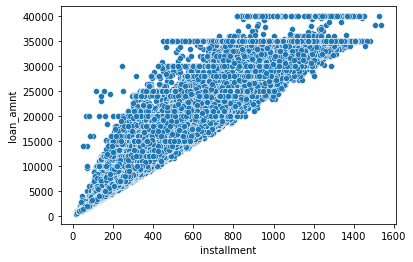

In [76]:
#The installment is 95% correlated with the loan amount, so it can be dropped
sns.scatterplot(data=df,x='installment',y='loan_amnt')


### Highly correlated with loan amount, so can be dropped

In [77]:
df.drop(['installment'], axis=1, inplace=True)

# Training the neural network

In [78]:
# Store values in the familiar X, y format for training data and label, respectively (label = 'loan_repaid')
X = df.drop('loan_repaid', axis=1).values
y = df['loan_repaid'].values

In [80]:
## Optional sampling for performance reasons
# df = df.sample(frac=0.1, random_state=101)

In [82]:
# Train - test split the data (20%)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 101)

## Create network architecture and train

In [83]:
# Use rectified linear unit activation function and adam optimizer
activation_function = 'relu'
optimizer = 'adam'
batch_size = 256
alpha = 2
N_h = X_train.shape[0]/(alpha*(X_train.shape[1]-1))

### Scale the data using the MinMaxScaler

In [84]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Define the neural network architecture (Sequential with 3 dense layers, second one half the input size)
### A 20% Dropout rate was chosen to avoid overfitting to the data

In [92]:
input_shape = X_train.shape[1]
model = Sequential([
    Dense(input_shape, activation = activation_function),
    Dropout(0.2),
    
    Dense(np.ceil(input_shape/2), activation = activation_function),
    Dropout(0.2),

    Dense(units = 1, activation='sigmoid')
    ])

### Since the problem is a binary classification problem, we use binary cross-entropy as a loss function. We also include an Early Stopping callback to avoid training after the validation loss stops decreasing

Train on 316175 samples, validate on 79044 samples
Epoch 1/25
316175/316175 [==============================] - 4s 12us/sample - loss: 0.4126 - val_loss: 0.3732
Epoch 2/25
316175/316175 [==============================] - 3s 11us/sample - loss: 0.3707 - val_loss: 0.3624
Epoch 3/25
316175/316175 [==============================] - 3s 11us/sample - loss: 0.3642 - val_loss: 0.3598
Epoch 4/25
316175/316175 [==============================] - 3s 11us/sample - loss: 0.3601 - val_loss: 0.3516
Epoch 5/25
316175/316175 [==============================] - 3s 11us/sample - loss: 0.3325 - val_loss: 0.3045
Epoch 6/25
316175/316175 [==============================] - 3s 10us/sample - loss: 0.3002 - val_loss: 0.2857
Epoch 7/25
316175/316175 [==============================] - 3s 10us/sample - loss: 0.2900 - val_loss: 0.2830
Epoch 8/25
316175/316175 [==============================] - 3s 10us/sample - loss: 0.2858 - val_loss: 0.2806
Epoch 9/25
316175/316175 [==============================] - 3s 11us/sample - 

<AxesSubplot:>

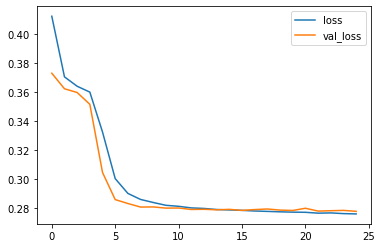

In [93]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy' )
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = batch_size, epochs = 25, callbacks = [early_stop])

model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Evaluate the network

In [94]:
# Print Confusion matrix and classification report
y_pred = model.predict_classes(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# The labels are imbalanced, so Accuracy is not as important as Recall
print('Accuracy by just predicting "Fully Paid" every time: {perc:.2f}%'
      .format(perc = df['loan_repaid'].value_counts()[1]/len(df)*100))

              precision    recall  f1-score   support

           0       0.99      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044

[[ 6842  8816]
 [  101 63285]]
Accuracy by just predicting "Fully Paid" every time: 80.38%


## The majority of people pay back the loans, and this imbalance in the data makes the prediction task more complicated. The current iteration is a first solution to this problem used in the Udemy Data Science and Machine Learning Bootcamp.